In [2]:
import pandas as pd
import numpy as np

In [18]:
origin = pd.read_csv("../nlp_poem.csv")

before_label_nouns = pd.read_csv("../1. 클래스 추출/두번째 방법/poem_before_labeling_nouns.csv")
before_label_verbs = pd.read_csv("../1. 클래스 추출/두번째 방법/poem_before_labeling_verbs.csv")

In [5]:
before_label_nouns = before_label_nouns.fillna(-1)
before_label_verbs = before_label_verbs.fillna(-1)

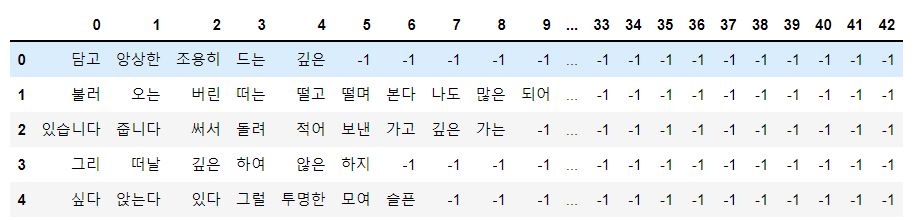

In [7]:
# 분류한 단어들 모두 입력

hope_list = [
     '착한', '맑게', '힘차게', '깨끗', '반짝', '환한', '피어나는', '영원히', '투명한', '위대', '찬란한', '괜찮',
    '근사한', '환하게', '환히', '밝은', '새로', '차오르는', '익숙', '싱싱한', '화려한', '멋진', '쉬운' '뜨거운',
    '소망', '희망', '용기', '피어', '활짝', '자유','연습','방법','준비','통과','완성','약속','안녕','약속'
]

love_happy_list =[
    '좋은', '예쁜', '예쁘', '좋겠', '웃고', '좋았다', '소중한', '웃으', '사랑', '좋고', '껴안', '기쁜', '웃는',
    '어루만', '좋아', '아름다운', '춤추', '좋다', '향기로', '따뜻한', '품은', '감싸', '따스한', '부끄', '웃어',
    '반가운', '다정한', '빛나는', '부드러운', '달콤한', '여린', '고운', '사랑', '기쁨', '행복', '웃음',
    '고백', '미소', '만남', '애인', '첫사랑','놀이','선물','친구','사랑스럽다'
]

anger_disgusting_list = [
    '싫은', '싫어', '미워', '미친', '비린', '구겨', '무너', '뿌연', '미끄', '흐린', '오래된', '좁은', '나쁜',
    '잊지', '잊어', '말라', '썩어', '축축한', '얼어', '깨진', '낡은', '시든', '가난한', '시들', '시린', '타는', '차가운'
    '침묵', '버려진', '주름', '욕망', '취해'

]

sadness_pain_list = [
    '우는', '슬퍼', '아파', '울었', '외로운', '지쳐', '슬프', '괴로', '슬픈', '쓸쓸', '울어', '아픈', '잃은', '잃고',
    '서러운', '아프', '배고픈', '힘든', '외롭', '앓는', '지친', '힘들', '애써', '앙상한', '어려운', '추운', 
    '울음', '눈물', '가슴', '슬픔', '이별', '고독', '아픔', '그리움', '기다림', '상처', '마지막', '한숨',
    '고통', '고단', '혼자', '홀로', '뚝뚝', '구멍','가시','나그네', '아프다'


]

fear_list = [
    '간절', '떠났다', '도망', '서늘', '떨어', '무서', '어두', '잃지', '떠날', '망설',
    '어둡', '죽으면', '떨고', '낯설', '캄캄', '떠난', '두려워', '절망',
    '비명', '불안', '신음', '경계', '공포', '절벽', '두려움', '포기', '걱정', '허물'


]

thoughful_list = [
    '생각','후회','까닭','용서','적막','비록','발견','시선','의미','정신','선택','안부','거짓말','인사',
    '소식','대답','질문','이유','기도','운명','꿈속','상상','수면','기분','이해','감정','느낌',
    '감고','마음','비밀','소문','현실','나라','필요','스스로','인간','세상','천국',
    '미안', '고요', '궁금', '깨닫', '잠잠', '잠든', '놀라','살아','조용히','잠들'

]

death_list = [
    '고요','생명','죽음','목숨','죽여','늙어','늙은','영혼','존재', '죽어', '죽으면', '죽었', '죽는', '죽고','죽은','유령', '묘터'
]

nature_list = [
    '하늘', '나무', '가을', '햇살', '강물', '사막', '태양', '풍경', '얼음', '안개', '나뭇', '계절', '햇빛',
    '여름', '노을', '달빛', '물결', '물속', '정원', '장미','낙엽', '이파리', '빗줄기', '천둥', '호수', '세계',
    '모래', '별빛', '봄날', '새벽', '동쪽','봄비', '물길', '어둠', '구름', '저녁', '단풍', '밤하늘', '폭설',
    '눈발', '지구', '햇볕','강가', '짐승', '바닷', '매화', '고구마', '화분', '제비', '해바라기', '바나나', '동물',
    '낙타', '민들레', '넝쿨', '빗물', '자두', '솔잎', '잎새', '기린', '호랑이', '당나귀', '파리', '꽃들이', '돌멩이',
    '호박', '물가', '골짜기', '바위', '고추', '거미', '들판', '벌레', '버찌', '씨앗', '돼지', '벚꽃', '물의',
    '동백', '개미', '강변', '비둘기', '고양이', '물고기', '풀잎', '초록', '물이', '꼬리', '송이', '꽃잎', '바다',
    '까치', '열매', '물방울', '목련', '파도', '달이', '줄기', '살구', '뿌리', '겨울', '푸른', '아침', '빗방울',
    '잎사귀', '그루', '달팽이', '나비', '오이', '우주', '이슬', '바람', '벼랑', '물살', '물기', '진흙', '천지',
    '거품', '오리', '공기', '깃털', '지상','보리','저수지','자전','날개','언덕','방울','비늘', '지느러미','껍질',
    '껍데기', '피고'
]

family_list = [
    '엄마', '할아버지', '가족', '아빠', '언니', '할머니', '아기', '아들', '아내', '아버지', '식구', '자식',
    '어미', '새끼', '아이', '어머니', '아가'
]

time_list = [
    '오늘', '하루', '과거', '생애', '미래', '옛날', '어제', '추억', '세월', '가끔', '시계', '기억', '시간',
    '나이', '인생', '평생', '간직', '종일', '반복', '전생', '무한', '일생', '일상', '일요일', '오후', '매달',
    '내일', '처음', '그날', '지난', '도착', '시작', '천년', '시절', '영원', '매일', '한낮', '흔적', '얼마',
    '순간', '지금', '차례', '노인', '무덤', '소년', '무렵', '속도', '서서히',  '밤새', '생활','그늘','동안'
]

body_list = [
    '목소리', '무릎', '얼굴','입술', '어깨', '눈빛', '허리', '손톱', '옆구리', '눈길', '손가락', '맨발',
    '발목', '손목', '눈썹', '발가락', '감기', '발걸음', '주먹', '손길', '발바닥', '숨소리', '엉덩이',
    '오줌', '온기', '손끝', '체온', '발톱', '정수리', '발끝', '표정', '눈동자', '몸속', '심장', '이마',
    '발자국', '손바닥', '온몸', '눈꺼풀', '이빨', '숨결', '머리', '눈앞', '뒷모습','팔이' 
]

house_list = [
    '지붕', '그릇', '이불', '창가', '담장', '바지', '식탁', '노트', '계단', '거울', '전화', '침대',
    '길가', '마당', '책장', '유리', '난간', '인형', '바닥', '우물', '종이', '울타리', '양말', '가방',
    '동네', '치마', '신발', '우산', '창밖', '커피', '가게', '잠자리', '마을', '항아리', '거리', '창문',
    '귀가', '대문', '도로', '모퉁이', '마루', '처마', '가위', '고향', '바늘','모자','계란', '고기', '소금', '뚜껑'
]

literature_list = [
    '편지', '문장', '도서관', '페이지', '글씨', '시집', '언어', '말씀', '글자', '시인','얘기','이야기'

]

sense_list = [
    '향기', '노래', '불빛', '냄새', '음악', '소리','파란', '촛불', '분홍', '은빛', '누런', '황금',
    '검정', '노랑',  '얼룩', '연기', '반짝', '불꽃', '빛깔', '휘파람', '그린','등불', '크게','자국','그림',
    '사진', '무늬', '모양', '조각','온통','무성','마구','무리','덩어리','뭉치', '가루', '파편','토막'
]

space_list = [
    '서쪽', '한쪽', '가운데', '지도', '사방', '여기저기', '왼쪽', '중심', '오른', '모서리','공간',
    '부분', '구석', '근처', '공중', '고개', '바깥', '배경', '허공', '여행', '귀퉁이','기슭','무게',
    '방향', '수평', '크기','갈수록','가도','자세','움직'
]

city_list = [
    '마네킹', '버스','공장','기차','고무','구두','배달','바퀴','신호등','동전','비닐','먼지','아파트','담배',
    '골목','시장', '학교', '서울', '도시', '소주','보도','지하','건물','굴뚝','옥상','상자','주머니','사물'
]

num_list = [
    '숫자', '다섯', '일곱', '여섯', '아홉', '한번','둘','셋','넷'

]

In [10]:
# 값이 들어갈 빈 데이터 프래임 생성

poem_after_labeling = pd.DataFrame(index = range(len(before_label_nouns)), columns=['행복', '사랑', '분노', '슬픔', '두려움', '생각', '죽음', '자연', '가족', '시간', '신체', '집', '문학', '감각', '공간', '도시', '숫자'])
poem_after_labeling = poem_after_labeling.fillna(0)

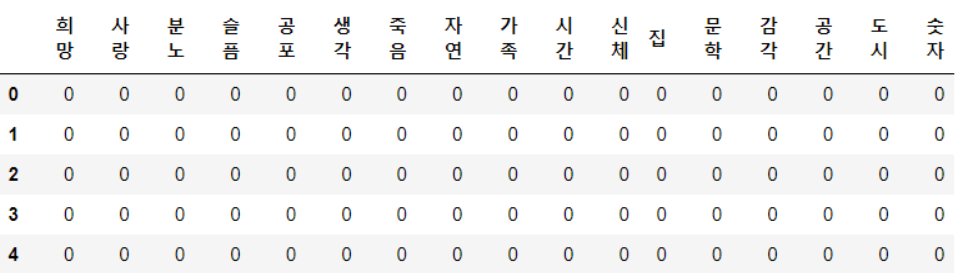

In [11]:
#명사 단어 클래스 매칭
for index in range(len(before_label_nouns)):
    row = before_label_nouns.iloc[index]
    
    for word in row:
        if word != -1:
            if word in hope_list:
                poem_after_labeling.loc[index, '행복'] = 1
            elif word in love_happy_list:
                poem_after_labeling.loc[index, '사랑'] = 1
            elif word in anger_disgusting_list:
                poem_after_labeling.loc[index, '분노'] = 1
            elif word in sadness_pain_list:
                poem_after_labeling.loc[index, '슬픔'] = 1
            elif word in fear_list:
                poem_after_labeling.loc[index, '두려움'] = 1
            elif word in thoughful_list:
                poem_after_labeling.loc[index, '생각'] = 1
            elif word in death_list:
                poem_after_labeling.loc[index, '죽음'] = 1
            elif word in nature_list:
                poem_after_labeling.loc[index, '자연'] = 1
            elif word in family_list:
                poem_after_labeling.loc[index, '가족'] = 1
            elif word in time_list:
                poem_after_labeling.loc[index, '시간'] = 1
            elif word in body_list:
                poem_after_labeling.loc[index, '신체'] = 1
            elif word in house_list:
                poem_after_labeling.loc[index, '집'] = 1
            elif word in literature_list:
                poem_after_labeling.loc[index, '문학'] = 1
            elif word in sense_list:
                poem_after_labeling.loc[index, '감각'] = 1
            elif word in space_list:
                poem_after_labeling.loc[index, '공간'] = 1
            elif word in city_list:
                poem_after_labeling.loc[index, '도시'] = 1
            elif word in num_list:
                poem_after_labeling.loc[index, '숫자'] = 1
                
#명사, 형용사 단어 클래스 매칭
for index in range(len(before_label_verbs)):
    row = before_label_verbs.iloc[index]
    
    for word in row:
        if word != -1:
            if word in hope_list:
                poem_after_labeling.loc[index, '행복'] = 1
            elif word in love_happy_list:
                poem_after_labeling.loc[index, '사랑'] = 1
            elif word in anger_disgusting_list:
                poem_after_labeling.loc[index, '분노'] = 1
            elif word in sadness_pain_list:
                poem_after_labeling.loc[index, '슬픔'] = 1
            elif word in fear_list:
                poem_after_labeling.loc[index, '두려움'] = 1
            elif word in thoughful_list:
                poem_after_labeling.loc[index, '생각'] = 1
            elif word in death_list:
                poem_after_labeling.loc[index, '죽음'] = 1
            elif word in nature_list:
                poem_after_labeling.loc[index, '자연'] = 1
            elif word in family_list:
                poem_after_labeling.loc[index, '가족'] = 1
            elif word in time_list:
                poem_after_labeling.loc[index, '시간'] = 1
            elif word in body_list:
                poem_after_labeling.loc[index, '신체'] = 1
            elif word in house_list:
                poem_after_labeling.loc[index, '집'] = 1
            elif word in literature_list:
                poem_after_labeling.loc[index, '문학'] = 1
            elif word in sense_list:
                poem_after_labeling.loc[index, '감각'] = 1
            elif word in space_list:
                poem_after_labeling.loc[index, '공간'] = 1
            elif word in city_list:
                poem_after_labeling.loc[index, '도시'] = 1
            elif word in num_list:
                poem_after_labeling.loc[index, '숫자'] = 1

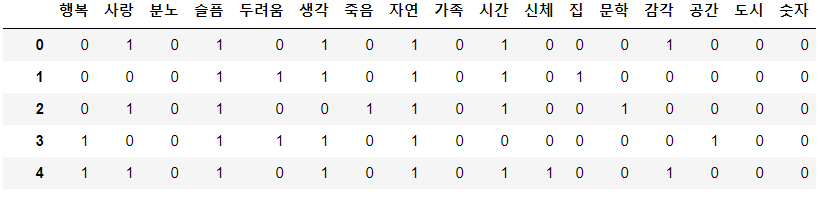

In [12]:
# 1이 하나도 없는 시의 인덱스 확인
nums = poem_after_labeling.sum(axis=1)

for index, n in enumerate(nums):
    if n == 0:
        print(index)

72
122
155
157
169
181
225
307
334
381
496
508
518
568
575
586
630
648
656
673
702
736
787
800
804
826
859
872
874
879
880
882
884
894
902
910
911
929
936
947
952
960
961
973
984
989
991
995
1011
1012
1014
1015
1020
1029
1038
1099
1117
1124
1130
1153
1160
1166
1174
1181
1194
1209
1210
1215
1220
1228
1247
1249
1267
1270
1283
1291
1316
1335
1343
1350
1356
1358
1361
1369
1381
1383
1389
1390
1410
1412
1423
1427
1429
1444
1459
1468
1477
1497
1499
1527
1528
1542
1552
1564
1577
1612
1617
1627
1635
1638
1650
1654
1655
1664
1673
1684
1692
1693
1720
1756
1772
1784
1787
1794
1806
1811
1820
1844
1853
1870
1886
1902
1908
1913
1920
1950
1953
1963
1965
1973
1988
2001
2004
2006
2010
2016
2017
2022
2034
2037


# 파일 저장

In [20]:
poem_after_labeling[['content', 'author', 'title']] = origin[['content', 'author', 'title']]

In [22]:
poem_after_labeling.to_csv("poem_final_label.csv", index=False)

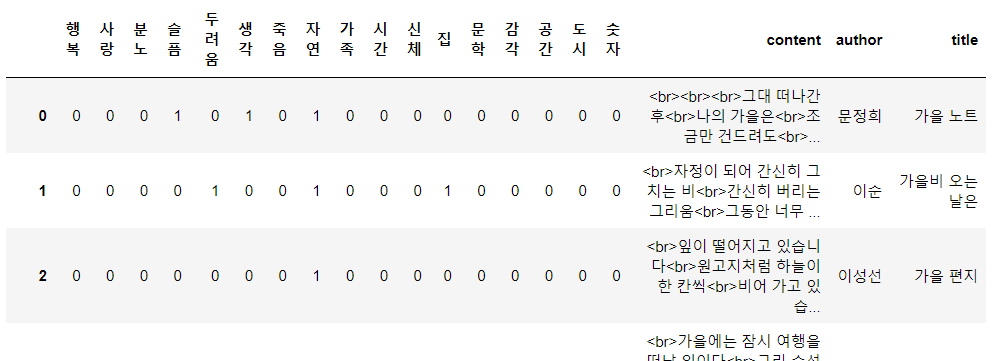